In [1]:
import pymysql

connector = pymysql.connect(user='dev', password='ax2',host='127.0.0.1',port=3307,db='pythonexam')
cursor = connector.cursor()

query = ('SELECT country, total_deaths from corona20200515 WHERE LENGTH(total_cases) > 6 and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s')
where_not = "North America", "Asia", "South America", "Europe", "World", "Total:", "Africa", "Oceania", "South Africa"
cursor.execute(query, where_not)

countries = []
total_deaths =[]
total = []
for country, totaldeaths in cursor:
    countries.append(country)
    deaths = totaldeaths.replace(',','')
    deaths_int = int(deaths)
    total_deaths.append(deaths_int)
    
cursor.close()
connector.close()

In [3]:
import pandas as pd

df = pd.DataFrame({'Total Deaths': total_deaths},countries)
df

,Total Deaths
USA,86912
Spain,27459
Russia,2418
UK,33614
Italy,31368
Brazil,13999
France,27425
Germany,7928
Turkey,4007
Iran,6854


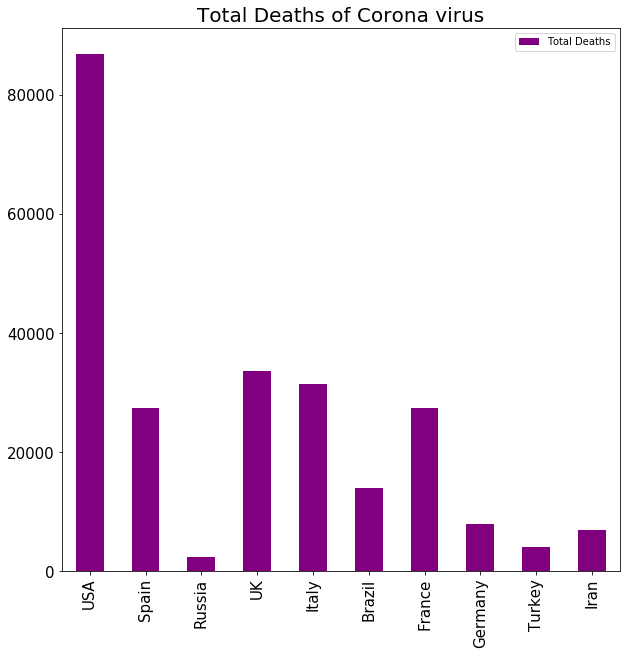

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

df.plot.bar(figsize=(10,10), color='purple')

plt.title('Total Deaths of Corona virus', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()
#plt.savefig('total_deaths_2020-05-15.jpg')